# Titanic Survival Prediction Using Machine Learning

The sinking of the RMS Titanic in 1912 remains one of the most infamous maritime disasters in history, leading to significant loss of life. Over 1,500 passengers and crew perished that fateful night. Understanding the factors that contributed to survival can provide valuable insights into safety protocols and social dynamics during crises. In this project, we will leverage machine learning techniques to predict the survival chances of Titanic passengers based on various features, such as sex, age, and passenger class. Using the Random Forest classification algorithm, we aim to build a predictive model that will allow us to estimate the likelihood of survival for each individual aboard the Titanic.

### Part A: Objective of the Project: Predicting Titanic Passenger Survival

The primary objective of this project is to develop a machine learning model capable of predicting the survival status of Titanic passengers based on available data. The dataset includes information such as demographic attributes (age, sex), socioeconomic status (fare, class), and other relevant features. By analyzing these features, we seek to identify patterns that could influence survival rates and subsequently use these insights to make predictions on unseen data.

There will be three main steps in this experiment:

- Feature Engineering
- Imputation
- Training and Prediction

For this project, we will utilize the Titanic dataset. The dataset consists of the following files:

1. train.csv: Contains information about the passengers and their survival status, which will be used for training our model. Serves as our primary data source for training and validation, providing both features and target labels.
2. test.csv: Includes details of passengers without survival labels, which we will use for making predictions. Allows us to assess the model's performance on unseen data, simulating a real-world scenario where predictions must be made for new passengers.
3. gender_submission.csv: A sample submission file that demonstrates the format required for submitting predictions.

### Part B: Step-by-Step Implementation: Predicting Titanic Survival

1. Importing Libraries and Initial setup

In [29]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

print(train.shape)
print(train.head())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [31]:
print(test.shape)
print(test.head())

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [32]:
print(gender.shape)
print(gender.head())

(418, 2)
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. Data Visualization: Understanding Survival Trends and Passenger Demographics

Let us first visualize the number of survivors and death counts:

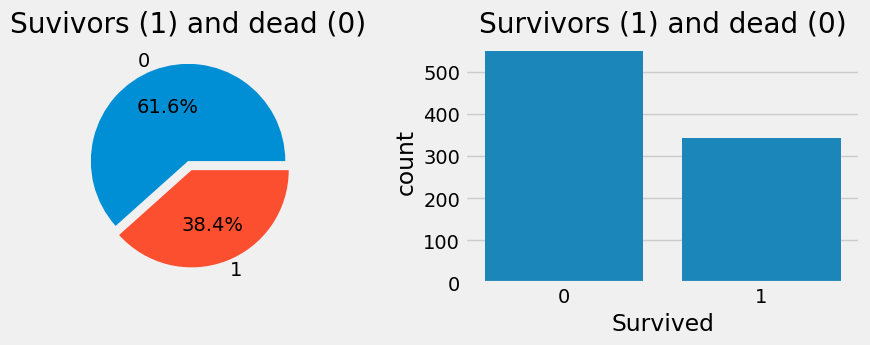

In [36]:
f, ax = plt.subplots(1,2, figsize=(10,3))
train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Suvivors (1) and dead (0)')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=train, ax=ax[1])
ax[1].set_title('Survivors (1) and dead (0)')
plt.show()

Analyzing the Impact of Sex on Survival Rates: Reflects the focus on exploring how the gender of passengers influenced their chances of survival.

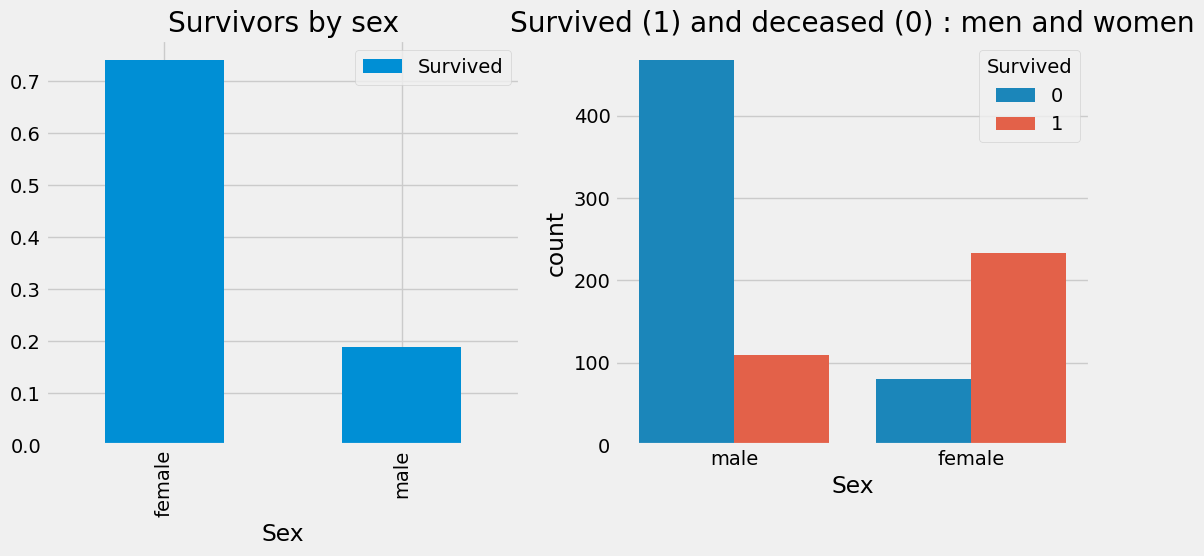

In [37]:
f, ax = plt.subplots(1, 2, figsize=(12,5))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')

sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Survived (1) and deceased (0) : men and women')

plt.show()


3. Feature Engineering: Optimizing Data for Model Training

This section focuses on refining the dataset by removing irrelevant features and transforming categorical data into numerical formats. Key tasks include:

- Dropping Redundant Features: Removing columns like Cabin, Ticket that offer limited predictive value.
- Creating New Features: Introducing a new column to indicate whether cabin information was assigned or not.
- Data Transformation: Converting textual data into numerical categories for seamless model training.

In [38]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [39]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

There are 2 missing values in the Embarked feature. For that, we will replace the NULL values with 'S' as the number of Embarks for 'S' are higher than the other two.

In [40]:
train = train.fillna({"Embarked": "S"})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


We will now sort the age into groups. We will combine the age groups of the people and categorize them into the same groups. BY doing so we will be having fewer categories and will have a better prediction since it will be a categorical dataset.

In [41]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels= ['Unknow','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)

In the 'title' column for both the test and train set, we will categorize them into an equal number of classes. Then we will assign numerical values to the title for convenience of model training.

In [42]:
from IPython.display import display

combine = [train, test]

# extract a title for each name int he train and test datasets
# expand=False –-- tells pandas to return a Series (one column). 
# If you had multiple capture groups and set expand=True, you’d get a DataFrame.
# find a space, then one or more letters, then a dot. It grabs the first occurrence of that anywhere in the string

for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

display(train[['Name','Title']].head())

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [43]:
display(pd.crosstab(train['Title'], train['Sex']))

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [44]:
# Replace various titles with more common names

dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
dataset['Title'] = dataset['Title'].replace(['Countess', "Lady" 'Sir'], 'Royal')

print(dataset['Title'].value_counts())

Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64


In [45]:
# map each of the title groups to a numerical value

title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master": 4, "Royal": 5, "Rare": 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

display(train[['Name','Sex','Title']].head(10))

,Name,Sex,Title
0,"Braund, Mr. Owen Harris",male,1.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0
2,"Heikkinen, Miss. Laina",female,2.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0
4,"Allen, Mr. William Henry",male,1.0
5,"Moran, Mr. James",male,1.0
6,"McCarthy, Mr. Timothy J",male,1.0
7,"Palsson, Master. Gosta Leonard",male,4.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,3.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,3.0


Now assign a numerical value to each age category. Once we have mapped the age into different categories we do not need the age feature. Hence drop it

In [46]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, "Young Adult": 5, 'Adult': 6, 'Senior': 7}

train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,1.0


In [47]:
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,892,3,"Kelly, Mr. James",male,0,0,7.8292,Q,5.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,6.0,3
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,7.0,1
3,895,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,5.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,4.0,3


Assign numerical values to sex and embarks categories\

In [48]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,1,4.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,2,6.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,1,5.0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,1,5.0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,1,5.0,1.0


Fill in the missing Fare value in the test set based on the mean fare for that P-class

In [49]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]    #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)


# Or we can use below for a clean, safe and fast way
# fare_means = train.roupby('Pclass')['Fare'].mean()
# test['Fare'] = test['Fare'].fillna(test['Pclass'].map(fare_means)).fillna(train['Fare'].mean()).round(4)

train['FareBand'] = pd.qcut(train['Fare'], q=4, labels=[1,2,3,4])
test['FareBand'] = pd.qcut(test['Fare'], q=4, labels=[1,2,3,4])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,7.2500,1,4.0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,71.2833,2,6.0,3.0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,7.9250,1,5.0,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,53.1000,1,5.0,3.0,4
4,5,0,3,"Allen, Mr. William Henry",0,0,0,8.0500,1,5.0,1.0,2


In [50]:
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,1,4.0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,6.0,3.0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,1,5.0,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,1,5.0,3.0,4
4,5,0,3,"Allen, Mr. William Henry",0,0,0,1,5.0,1.0,2


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Embarked     891 non-null    int64   
 8   AgeGroup     714 non-null    float64 
 9   Title        891 non-null    float64 
 10  FareBand     891 non-null    category
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 70.8+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Embarked     418 non-null    int64   
 7   AgeGroup     332 non-null    float64 
 8   Title        418 non-null    int64   
 9   FareBand     418 non-null    category
dtypes: category(1), float64(1), int64(7), object(1)
memory usage: 30.1+ KB


4. Model Training: Building the Predictive Model

In this phase, we employ Random Forest as our algorithm to train the model for predicting survival. Key steps include:

- Data Splitting: Dividing the dataset into 80% training and 20% testing subsets using train_test_split() from the sklearn library.
- Model Selection: Leveraging the Random Forest algorithm, known for its robustness and ability to handle diverse data.
- Performance Evaluation: Assessing the trained model's accuracy on the test data to ensure it generalizes well.

In [57]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived', 'PassengerId','Name'], axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

acc_randomforest = round(accuracy_score(y_pred, y_test)* 100, 2)
print(acc_randomforest)

86.59


With this, we got an accuracy of 86.59%

### Part C: Prediction: Generating Survival Predictions on Test Data

In this final phase, we use the trained Random Forest model to make predictions on the test dataset. The key steps are:

- Running Predictions: Input the test dataset into the trained model to predict survival outcomes.
- Preparing Results: Store the PassengerId from the test data and the corresponding Survival predictions (0 or 1).
- Saving the Output: Export the predictions to a CSV file for submission, with two columns:
    - PassengerId: ID of each passenger from the test dataset.
    - Survival: Predicted survival status (0 = Did not survive, 1 = Survived).